In [33]:
import os

WIDTH = 500

coral = '#FE7747'
glaucous = '#6889BE'
cobalt_blue = '#1D4BAB'
desert_sand = '#D8BFAE'
amaranth_purple = '#AC083A'
brunswick_green = '#0C584E'
pigment_green = '#02B456'
raisin_black= '#2D2523'

EDGE_LENGTH = WIDTH / 6.5
HEIGHT = int(7.5 * EDGE_LENGTH)

def setup():
    size(WIDTH, HEIGHT)
    smooth()
    background(raisin_black) 
    
    global x_axis_iso, y_axis_iso, x_plus_y_iso
    x_axis_iso = Py5Vector.from_heading(radians(30)).set_mag(EDGE_LENGTH)
    y_axis_iso = Py5Vector.from_heading(radians(150)).set_mag(EDGE_LENGTH)
    x_plus_y_iso = x_axis_iso + y_axis_iso
    
    global diamond_0
    diamond_0 = create_shape()
    diamond_0.set_fill(pigment_green)
    with diamond_0.begin_closed_shape(): 
        diamond_0.vertex(0, 0)
        diamond_0.vertex(x_axis_iso.x, x_axis_iso.y)      
        diamond_0.vertex(x_plus_y_iso.x, x_plus_y_iso.y)
        diamond_0.vertex(y_axis_iso.x, y_axis_iso.y)
    
    global diamond_1
    diamond_1 = create_shape()
    diamond_1.set_fill(glaucous)
    with diamond_1.begin_closed_shape():        
        diamond_1.vertex(0, 0)
        diamond_1.vertex(x_axis_iso.x, x_axis_iso.y)      
        diamond_1.vertex(x_axis_iso.x + x_plus_y_iso.x, x_axis_iso.y + x_plus_y_iso.y)
        diamond_1.vertex(x_plus_y_iso.x, x_plus_y_iso.y)
    
    global diamond_2
    diamond_2 = create_shape()
    diamond_2.set_fill(coral)
    with diamond_2.begin_closed_shape():        
        diamond_2.vertex(0, 0)
        diamond_2.vertex(x_axis_iso.x, -x_axis_iso.y)      
        diamond_2.vertex(x_axis_iso.x + x_plus_y_iso.x, -x_axis_iso.y + x_plus_y_iso.y)
        diamond_2.vertex(x_plus_y_iso.x, x_plus_y_iso.y)
    
    global base_cube
    base_cube = create_shape(GROUP)
    push_matrix()
    base_cube.add_child(diamond_0)
    diamond_1.translate(y_axis_iso.x, y_axis_iso.y)
    base_cube.add_child(diamond_1)
    diamond_2.translate(x_plus_y_iso.x, x_plus_y_iso.y)
    base_cube.add_child(diamond_2)
    pop_matrix()
    
    no_stroke()
    no_loop()

def draw():
    translate(width/2, height/2)
    
    # white background
    white_shape = create_shape()
    white_shape.set_fill(desert_sand)
    with white_shape.begin_closed_shape():        
        white_shape.vertex(0, 0)
        white_shape.vertex(3 * x_axis_iso.x, 3 * -x_axis_iso.y)   
        white_shape.vertex(4 * x_axis_iso.x, 2 * -x_axis_iso.y) 
        white_shape.vertex(width/2, height/2)
        white_shape.vertex(-width/2, height/2)
        white_shape.vertex(4 * y_axis_iso.x, 2 * x_axis_iso.y)
        white_shape.vertex(3 * y_axis_iso.x, 3 * x_axis_iso.y)
    shape(white_shape)
    
    # top "cube"
    with push_matrix():
        translate(y_axis_iso.x, y_axis_iso.y - 4 * x_plus_y_iso.y)
        shape(base_cube)
        shape(base_cube, x_axis_iso.x + x_plus_y_iso.x, x_axis_iso.y + x_plus_y_iso.y)
        shape(base_cube, y_axis_iso.x + x_plus_y_iso.x, y_axis_iso.y + x_plus_y_iso.y)
        shape(base_cube, 2 * x_plus_y_iso.x, 2 * x_plus_y_iso.y)
        shape(base_cube, x_axis_iso.x, x_axis_iso.y)
        shape(base_cube, y_axis_iso.x, y_axis_iso.y)
    
    # bottom "cube"
    diamond_0.set_fill(amaranth_purple)
    diamond_1.set_fill(brunswick_green)
    diamond_2.set_fill(cobalt_blue)
    
    with push_matrix():
        rotate(PI)
        translate(y_axis_iso.x, 3.5 * -x_plus_y_iso.y)
        shape(base_cube)
        shape(base_cube, x_axis_iso.x + x_plus_y_iso.x, x_axis_iso.y + x_plus_y_iso.y)
        shape(base_cube, y_axis_iso.x + x_plus_y_iso.x, y_axis_iso.y + x_plus_y_iso.y)
        shape(base_cube, 2 * x_plus_y_iso.x, 2 * x_plus_y_iso.y)
        shape(base_cube, x_axis_iso.x, x_axis_iso.y)
        shape(base_cube, y_axis_iso.x, y_axis_iso.y)

            
    save_frame(os.getcwd() + "/vasarely_2_####.png", use_thread=True)

run_sketch()

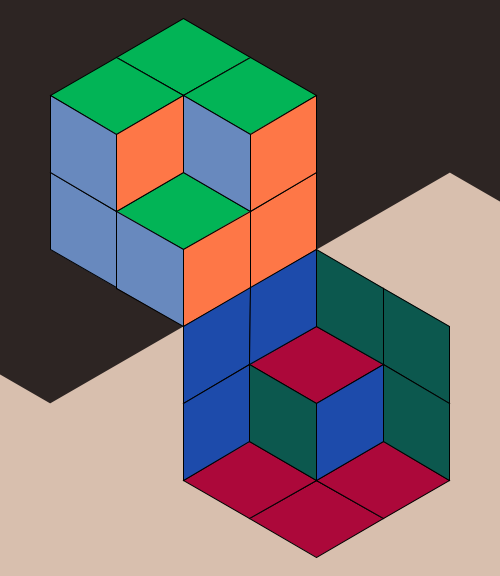